#  Final project:

# Group 34

# Adoptable - Dogs

###  Name of students:
Avishay musay<br>
Or bismot<br>
Lior bassel<br>


<a id='top'></a>

<div>
<img src="https://img.ice.co.il/giflib/news/rsPhoto/sz_342/rsz_615_346_WhatsApp%20Image%202022-09-12%20at%2010.54.21.jpeg?raw=true" width="800"/>
</div>

In [175]:
#!pip install geopandas
#!pip install folium
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
from IPython.display import Image


#### Information on the data
The target of our project is to minimize frequencies of railway accidents. <br>taken from [Kaggle]
https://www.kaggle.com/datasets/jmolitoris/adoptable-dogs

In [176]:
url = 'https://raw.githubusercontent.com/Lior1212avior/Adoptable---Dogs---Kaggel/main/ShelterDogs%20file.csv'
Dogs_DF = pd.read_csv(url)
Dogs_DF.shape

(2937, 19)

In [177]:
Dogs_DF.columns


Index(['ID', 'name', 'age', 'sex', 'breed', 'date_found', 'adoptable_from',
       'posted', 'color', 'coat', 'size', 'neutered', 'housebroken',
       'likes_people', 'likes_children', 'get_along_males',
       'get_along_females', 'get_along_cats', 'keep_in'],
      dtype='object')

In [178]:
Dogs_DF

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,23807,Gida,0.25,female,Unknown Mix,10/12/2019,11/12/2019,11/12/2019,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,533,Frida És Ricsi,0.17,female,Unknown Mix,01/12/2019,01/12/2019,09/12/2019,black and white,short,small,no,NaN,yes,yes,yes,yes,yes,NaN
2,23793,NaN,4.00,male,Unknown Mix,08/12/2019,23/12/2019,08/12/2019,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23795,NaN,1.00,male,Unknown Mix,08/12/2019,23/12/2019,08/12/2019,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23806,Amy,2.00,female,French Bulldog Mix,10/12/2019,11/12/2019,11/12/2019,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,118,Fodri,16.92,male,Unknown Mix,25/12/2003,25/12/2003,22/03/2006,yellow-brown,short,medium,no,no,yes,yes,no,yes,no,garden
2933,262,Csibi,17.33,female,Staffordshire Terrier Mix,27/08/2004,27/08/2004,08/07/2005,striped,short,large,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2934,4,Konrád,18.17,male,Unknown Mix,21/09/2005,21/09/2005,26/10/2005,black,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2935,141,Kölni,17.17,male,Unknown Mix,27/11/2004,27/11/2004,02/05/2005,black and brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Wrangling data

In [179]:
Dogs_DF.isnull().sum()

ID                      0
name                   92
age                     0
sex                     0
breed                   0
date_found              0
adoptable_from          0
posted                  0
color                   0
coat                    0
size                    0
neutered             1085
housebroken          2477
likes_people          938
likes_children       1718
get_along_males      1304
get_along_females    1264
get_along_cats       2506
keep_in              1021
dtype: int64

In [180]:
Dogs_DF['neutered'].fillna(0, inplace=True)
Dogs_DF['likes_people'].fillna(0, inplace=True)
Dogs_DF['likes_children'].fillna(0, inplace=True)
Dogs_DF['get_along_males'].fillna('size', inplace=True)
Dogs_DF['get_along_females'].fillna('size', inplace=True)

Dogs_DF.dtypes


ID                     int64
name                  object
age                  float64
sex                   object
breed                 object
date_found            object
adoptable_from        object
posted                object
color                 object
coat                  object
size                  object
neutered              object
housebroken           object
likes_people          object
likes_children        object
get_along_males       object
get_along_females     object
get_along_cats        object
keep_in               object
dtype: object

# Med data
#### Checking that these variables are within a reasonable range with Boxplot

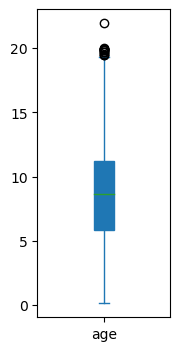

In [181]:
columns_of_interest = ["date_found","adoptable_from","posted","age","neutered"]
Reasonable_Range= Dogs_DF.filter(columns_of_interest).select_dtypes(include=np.number)

# ציור תרשימי Box plot
Reasonable_Range.plot(subplots=True, layout=(1, len(columns_of_interest)), kind='box', figsize=(12, 4), patch_artist=True)
plt.subplots_adjust(wspace=0.5)
plt.show()

#### The study area

# לפי תרשים ה - BOX PLOT ניתן לראות שטווח לגיל אימוץ הכלבים הינו בין 6-11 שנים


In [182]:
AVG_Dogs= Dogs_DF.groupby('sex')[['age']].mean()
AVG_Dogs

,age
sex,
female,8.515573
male,8.609881


# לפי תרשים ה - BOX PLOT ניתן לראות שהממוצע לגיל אימוץ הכלבים הינו בין 8-8.6 שנים


### Analysis of types of grafs

(array([0, 1, 2]),
 [Text(0, 0, 'medium'), Text(1, 0, 'large'), Text(2, 0, 'small')])

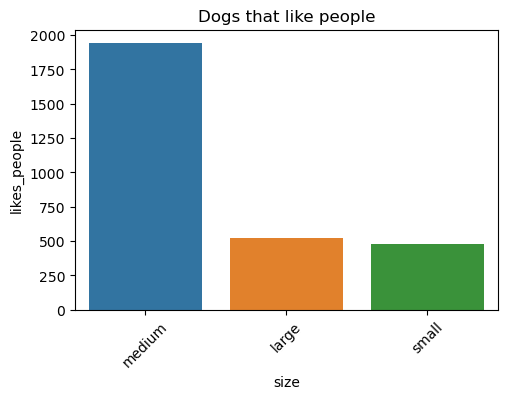

In [183]:
plt.figure(figsize=(12,8))
plt.subplot(221) 
sns.countplot(x='size', data=Dogs_DF, order=Dogs_DF['size'].value_counts().index)
plt.title('Dogs that like people')
plt.xlabel('size')
plt.ylabel('likes_people')
plt.xticks(rotation=45)

# תובנה ראשונה מהגרף המפולח לפי גודל הכלב ניתן לראות באופן חד ערכי שהגודל הממוצע הינו הכי אטרקטיבי לאימוץ בהונגריה

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

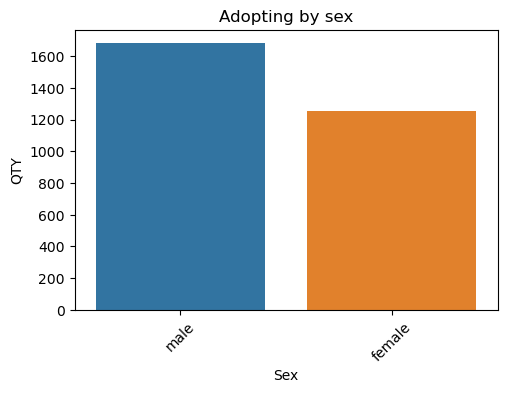

In [184]:
plt.figure(figsize=(12,8))
plt.subplot(222)  
sns.countplot(x='sex', data=Dogs_DF, order=Dogs_DF['sex'].value_counts().index)
plt.title('Adopting by sex')
plt.xlabel('Sex')
plt.ylabel('QTY')
plt.xticks(rotation=45)


# תובנה לפי הגרף אנו רואים שכלבים זכרים מאומצים יותר מנקבות

plt.figure(figsize=(20, 20))


plt.subplot(221)  
sns.countplot(x='size', data=Dogs_DF, order=Dogs_DF['size'].value_counts().index)
plt.title('Dogs that like people')
plt.xlabel('size')
plt.ylabel('likes_people')
plt.xticks(rotation=45)

plt.subplot(222)  
sns.countplot(x='sex', data=Dogs_DF, order=Dogs_DF['sex'].value_counts().index)
plt.title('Adopting by sex')
plt.xlabel('Sex')
plt.ylabel('QTY')
plt.xticks(rotation=45)

plt.subplot(223)  
sns.countplot(x='neutered', data=Dogs_DF, order=Dogs_DF['neutered'].value_counts().index)
plt.title('Adopting by neutered')
plt.xlabel('neutered')
plt.ylabel('QTY')
plt.xticks(rotation=45)

plt.subplot(224)  
sns.countplot(x='color', data=Dogs_DF, order=Dogs_DF['color'].value_counts().index)
plt.title('Adopting by Color')
plt.xlabel('color')
plt.ylabel('QTY')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

(array([0, 1, 2]), [Text(0, 0, 'yes'), Text(1, 0, '0'), Text(2, 0, 'no')])

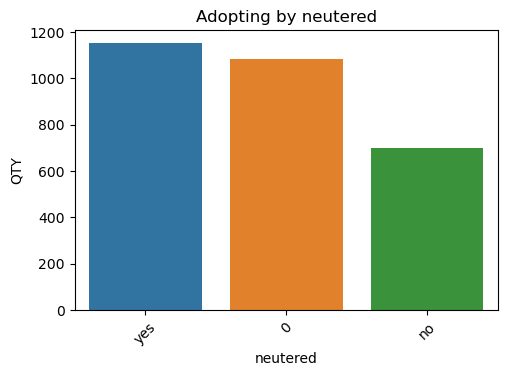

In [185]:
plt.figure(figsize=(12,8))
plt.subplot(223)  
sns.countplot(x='neutered', data=Dogs_DF, order=Dogs_DF['neutered'].value_counts().index)
plt.title('Adopting by neutered')
plt.xlabel('neutered')
plt.ylabel('QTY')
plt.xticks(rotation=45)

# תובנה מהגרף המפולח כפי שחשבנו מהניתוח ניתן לראות שכלבים מסורסים אומצו יותר משלא מסורסים

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'black'),
  Text(1, 0, 'brown'),
  Text(2, 0, 'black and brown'),
  Text(3, 0, 'yellow-brown'),
  Text(4, 0, 'black and white'),
  Text(5, 0, 'black and tan'),
  Text(6, 0, 'apricot'),
  Text(7, 0, 'brown and white'),
  Text(8, 0, 'white'),
  Text(9, 0, 'sable'),
  Text(10, 0, 'tricolor'),
  Text(11, 0, 'saddle back'),
  Text(12, 0, 'striped'),
  Text(13, 0, 'gray'),
  Text(14, 0, 'yellow'),
  Text(15, 0, 'golden'),
  Text(16, 0, 'red'),
  Text(17, 0, 'spotty'),
  Text(18, 0, 'gray and white'),
  Text(19, 0, 'gray and black'),
  Text(20, 0, 'wild boar'),
  Text(21, 0, 'red and white'),
  Text(22, 0, 'dotted')])

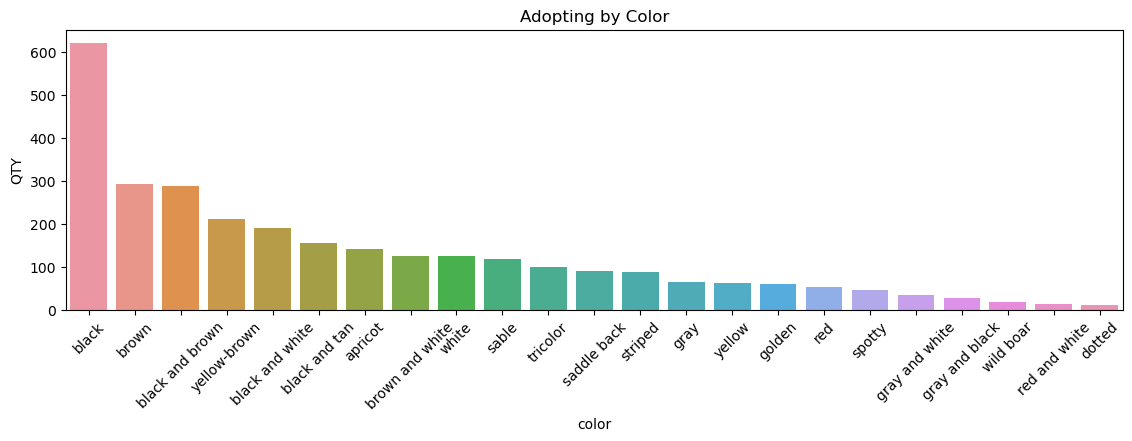

In [186]:
plt.figure(figsize=(30,8))
plt.subplot(224)  
sns.countplot(x='color', data=Dogs_DF, order=Dogs_DF['color'].value_counts().index)
plt.title('Adopting by Color')
plt.xlabel('color')
plt.ylabel('QTY')
plt.xticks(rotation=45)

#    תובנה מהגרף המפולח לפי צבע הכלב הופתענו לראות כי הצבע הכי מבוקש לאימוץ הינו צבע שחור   

In [187]:
Dogs_DF.head()

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,23807,Gida,0.25,female,Unknown Mix,10/12/2019,11/12/2019,11/12/2019,red,short,small,no,NaN,0,0,size,size,NaN,NaN
1,533,Frida És Ricsi,0.17,female,Unknown Mix,01/12/2019,01/12/2019,09/12/2019,black and white,short,small,no,NaN,yes,yes,yes,yes,yes,NaN
2,23793,NaN,4.00,male,Unknown Mix,08/12/2019,23/12/2019,08/12/2019,saddle back,short,medium,no,NaN,0,0,size,size,NaN,NaN
3,23795,NaN,1.00,male,Unknown Mix,08/12/2019,23/12/2019,08/12/2019,yellow-brown,medium,medium,no,NaN,0,0,size,size,NaN,NaN
4,23806,Amy,2.00,female,French Bulldog Mix,10/12/2019,11/12/2019,11/12/2019,black,short,small,no,NaN,0,0,size,size,NaN,NaN


#   הצגת קורלציות

In [188]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%d/%m/%Y")
    d2 = datetime.strptime(d2, "%d/%m/%Y")
    #return abs((d2 - d1).days)
    return ((d2-d1).days)

In [189]:
Dogs_DF['duration_time'] = Dogs_DF.apply(lambda row: days_between(row['date_found'] , row['adoptable_from']), axis=1)

In [190]:
Dogs_DF.head()
Dogs_DF.dtypes

ID                     int64
name                  object
age                  float64
sex                   object
breed                 object
date_found            object
adoptable_from        object
posted                object
color                 object
coat                  object
size                  object
neutered              object
housebroken           object
likes_people          object
likes_children        object
get_along_males       object
get_along_females     object
get_along_cats        object
keep_in               object
duration_time          int64
dtype: object

In [191]:
Dogs_DF['date_found_year'] = pd.to_datetime(Dogs_DF['date_found'],format="%d/%m/%Y").dt.year
Dogs_DF['adoptable_from_year'] = pd.to_datetime(Dogs_DF['adoptable_from'],format="%d/%m/%Y").dt.year
Dogs_DF.head()

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,...,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in,duration_time,date_found_year,adoptable_from_year
0,23807,Gida,0.25,female,Unknown Mix,10/12/2019,11/12/2019,11/12/2019,red,short,...,NaN,0,0,size,size,NaN,NaN,1,2019,2019
1,533,Frida És Ricsi,0.17,female,Unknown Mix,01/12/2019,01/12/2019,09/12/2019,black and white,short,...,NaN,yes,yes,yes,yes,yes,NaN,0,2019,2019
2,23793,NaN,4.00,male,Unknown Mix,08/12/2019,23/12/2019,08/12/2019,saddle back,short,...,NaN,0,0,size,size,NaN,NaN,15,2019,2019
3,23795,NaN,1.00,male,Unknown Mix,08/12/2019,23/12/2019,08/12/2019,yellow-brown,medium,...,NaN,0,0,size,size,NaN,NaN,15,2019,2019
4,23806,Amy,2.00,female,French Bulldog Mix,10/12/2019,11/12/2019,11/12/2019,black,short,...,NaN,0,0,size,size,NaN,NaN,1,2019,2019


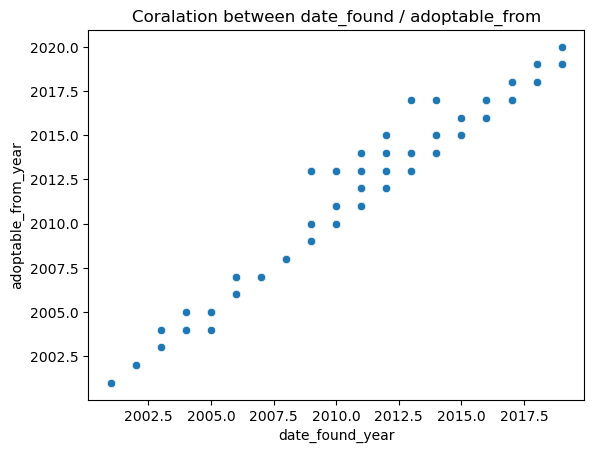

In [192]:
sns.scatterplot(data=Dogs_DF, x='date_found_year', y='adoptable_from_year')
plt.title('Coralation between date_found / adoptable_from')
plt.show()

# תובנה מהקורלציה הינה הפיזור הנ"ל הוא בין תאריך מציאת הכלב לבין תאריך האימוץ כפי שרואים יש קשר חזק ולינארי בין שני המשתנים ולכן ניתן להסיק שבין מציאת הכלב לבין אימוצו פרק הזמן הינו קצר 


In [193]:
Dogs_DF['neutered'].replace({'yes': 1, 'no': 0},inplace=True)
Dogs_DF['likes_people'].replace({'yes': 1, 'no': 0},inplace=True)

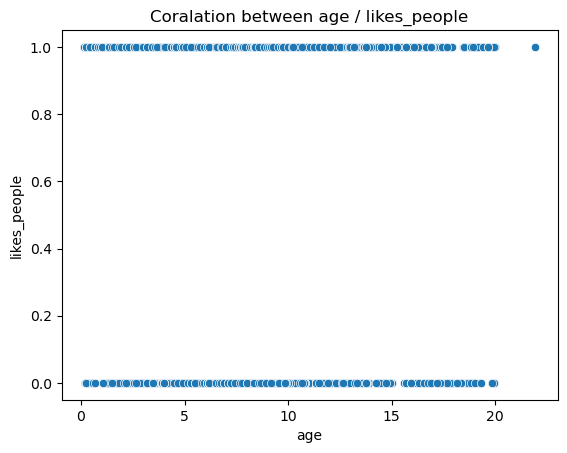

In [194]:
sns.scatterplot(data=Dogs_DF, x='age', y='likes_people')
plt.title('Coralation between age / likes_people')
plt.show()

 # הפיזור הינו בין גיל הכלב לבין כמה הכלב אוהב אנשים ז"א שאין קשר בין גיל הכלב לזה שנקשר לאנשים ביתר קלות 


# חברים לסיכום ראינו הרבה תובנות ונתונים מניתוח האמוץ בהונגריה וכעת לעבודת האימוץ :

 # [קישור לאתר האימוץ בהונגריה](http://www.allatok.info/search.php?language=en&species=kutya)

 # חברים יקרים כפי שראיתם בהונגריה מקפידים על אימוץ כלבים כפי שראינו בסקטר פלוט של הקורלציה , אנו חושבים ומאמינים שצריך ואפילו חובה לדאוג לבעלי החיים ולאמצם , נכון להיום לפי המידע שמצאנו מומתים הרבה כלבים שנמצאים בהסגר תקופה ארוכה מאחר ולא ניתן לההחזיקם מבחינה כלכלית לא סתם אומרים כלב = כולו לב , לכן אם אתם רוצים ידיד נאמן זה הזמן לאמץ 

<a id='top'></a>

<div>
<img src="https://img.mako.co.il/2013/06/05/girl_dog_c.jpg" width="800"/>
</div>